# **Analisa Data menggunakan Tools Pandas, Numpy, Seaborn, dan Matplotlib**

# **Kelompok 15**

**Anggota Kelompok :**

Kasyfi Zulkaisi Aufar (1301194397) 

Yogi Firgiawan (1301194228)

Yudha Yasa Afrizal Briano (1301194275)

Livia Naura Aqila (1301194089)


**Library Yang Digunakan :**

Pandas, Sebagai Alat Bantu Statistik Dalam Pengolahan Data
Numpy, Sebagai Manipulator Array Pada Data
Seaborn, Sebagai Visualisasi Data Yang Telah Di Modelkan
Matplotlib, Sebagai Library Tambahan Dalam Visualisasi Data

# LINE 1-5 untuk import file bank churners langsung dari web kaggle

In [ ]:
!pip install kaggle

# Harus mengupload file kaggle yang di download pada web kaggle

In [ ]:
from google.colab import files
files.upload()

Saving BankChurners.csv to BankChurners.csv


{'BankChurners.csv': b'"CLIENTNUM","Attrition_Flag","Customer_Age","Gender","Dependent_count","Education_Level","Marital_Status","Income_Category","Card_Category","Months_on_book","Total_Relationship_Count","Months_Inactive_12_mon","Contacts_Count_12_mon","Credit_Limit","Total_Revolving_Bal","Avg_Open_To_Buy","Total_Amt_Chng_Q4_Q1","Total_Trans_Amt","Total_Trans_Ct","Total_Ct_Chng_Q4_Q1","Avg_Utilization_Ratio","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"\n768805383,"Existing Customer",45,"M",3,"High School","Married","$60K - $80K","Blue",39,5,1,3,12691,777,11914,1.335,1144,42,1.625,0.061,9.3448e-05,0.99991\n818770008,"Existing Customer",49,"F",5,"Graduate","Single","Less than $40K","Blue",44,6,1,2,8256,864,7392,1.541,1291,33,3.714,0.105,5.6861e-05,0.99994\n713982108,"

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d sakshigoyal7/credit-card-customers

credit-card-customers.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile
file_name = "credit-card-customers.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

# Proses menganalisis data Bank Churners, dengan 5 metode

In [ ]:
df = pd.read_csv('BankChurners.csv')

In [ ]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


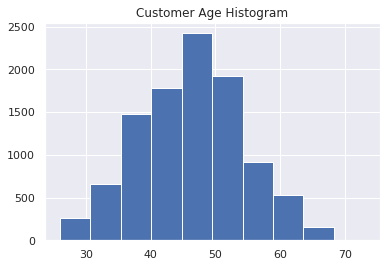

In [ ]:
x = df["Customer_Age"]
plt.hist(x, bins=10)
plt.title("Customer Age Histogram")
plt.show()

In [ ]:
Customer_Age = np.array(df['Customer_Age'])
print(Customer_Age)

[45 49 51 ... 44 30 43]


In [ ]:
print("Mean               :", Customer_Age.mean())
print("Median             :", np.median(Customer_Age))
print("Standard deviation :", Customer_Age.std())
print("Minimum            :", Customer_Age.min())
print("Maximum            :", Customer_Age.max())
print("Jumlah             :", np.sum(Customer_Age))

Mean               : 46.32596030413745
Median             : 46.0
Standard deviation : 8.01641820891176
Minimum            : 26
Maximum            : 73
Jumlah             : 469143


**Deskripsi Data** 

Tujuan dari metode histogram adalah mencari rata rata dan umur tertinggi, terendah dari customer

Berdasarkan dari histogram diatas lalu dicari nilai mean, minimum, maksimum.
Dikertahui bahwa rata - rata umur customer yaitu 46, termuda yaitu 26, dan yang tertua yaitu 73

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


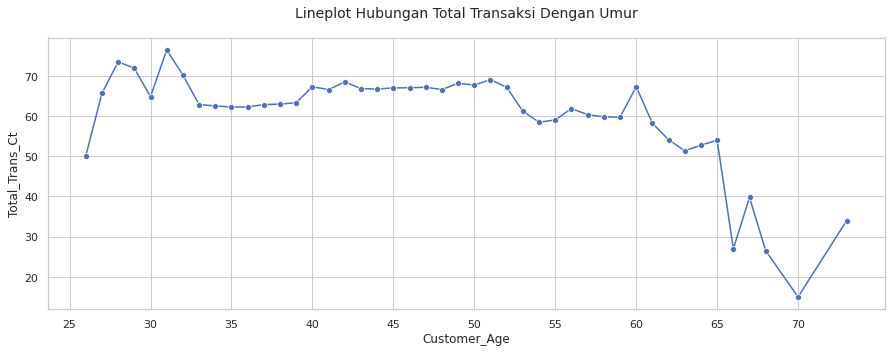

In [ ]:
sns.set_theme(style="whitegrid")
 
plt.figure(figsize=(15, 5))
plt.title('Lineplot Hubungan Total Transaksi Dengan Umur', fontsize="14", pad=20)
 
sns.lineplot(df['Customer_Age'] , df['Total_Trans_Ct'], marker="o", palette="deep", ci=None)
sns.set_context("notebook", rc={"lines.linewidth": 2.5})
sns.set_style("whitegrid")
 
plt.xticks(np.arange(25, max(df['Customer_Age'])+1, 5.0))
plt.show()

**Deskripsi Data**

Tujuan dari visualisasi diagram garis antara total transaksi dengan umur customer adalah untuk mengetahui total transaksi yang dilakukan oleh customer berdasarkan umurnya.

Dapat kita lihat pada diagram garis tersebut, sumbu x merupakan umur pengguna dan sumbu y merupakan total transaction count pengguna. Dari diagram garis tersebut, dapat disimpulkan bahwa semakin bertambahnya umur seorang pengguna, maka daya minat beli mereka akan semakin turun

In [ ]:
sns.set_style("white")
sns.set_context("talk", font_scale = 1)

([<matplotlib.patches.Wedge at 0x7f2e2b660a90>,
 [Text(-0.9628371444551311, 0.5319254019667504, 'Existing Customers'),
  Text(0.9628371693563555, -0.5319253568930898, 'Attrited Customers')],
 [Text(-0.525183896975526, 0.29014112834550015, '83.93%'),
  Text(0.5251839105580121, -0.2901411037598671, '16.07%')])

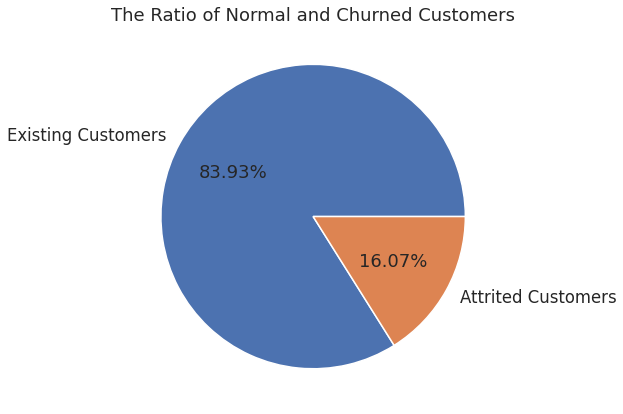

In [ ]:
churn = pd.value_counts(df["Attrition_Flag"]).tolist()
plt.figure(figsize = (15,7))
plt.title("The Ratio of Normal and Churned Customers")
plt.pie(x = churn, labels = ["Existing Customers", "Attrited Customers"], autopct='%.2f%%')

**Deskripsi Data**

Tujuan penggunaan diagram lingkaran pada "Attrition_Flag" yaitu melihat presentase dari Existing Customers dan Attried Customers agar dapat dilihat seimbang atau tidak

Dapat dilihat dari diagram lingkaran bahwa datanya tidak seimbang. Lebih dominan existing customers dibanding attrited customers.

([<matplotlib.patches.Wedge at 0x7f2e2b5f2518>,
 [Text(-0.07231539300945998, 1.0976203733230754, 'Female'),
  Text(0.07231549577609601, -1.097620366552415, 'Male')],
 [Text(-0.03944475982334181, 0.5987020218125866, '52.09%'),
  Text(0.03944481587787055, -0.598702018119499, '47.91%')])

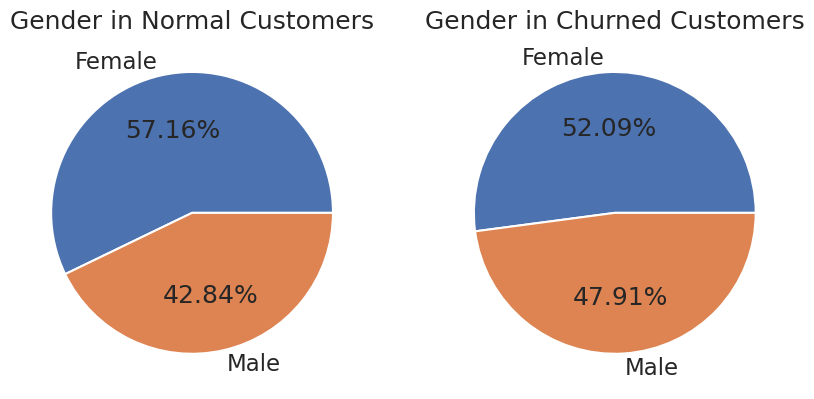

In [ ]:
gender_normal = df.loc[df["Attrition_Flag"] == "Attrited Customer", ["Gender"]].value_counts().tolist()
gender_churned = df.loc[df["Attrition_Flag"] == "Existing Customer", ["Gender"]].value_counts().tolist()
fig, ax = plt.subplots(1, 2, dpi = 100, figsize = (10,7))
ax[0].set_title("Gender in Normal Customers")
ax[0].pie(x = gender_normal, labels = ["Female", "Male"], autopct='%.2f%%')
ax[1].set_title("Gender in Churned Customers")
ax[1].pie(x = gender_churned, labels = ["Female", "Male"], autopct='%.2f%%')

**Deskripsi Data**

Perempuan dan laki-laki sama-sama memiliki rasio yang sama untuk jenis kelamin yang sudah ada dan jenis kelamin yang mengalami kelonjakan yaitu berhenti atau tidak dalam bank ini

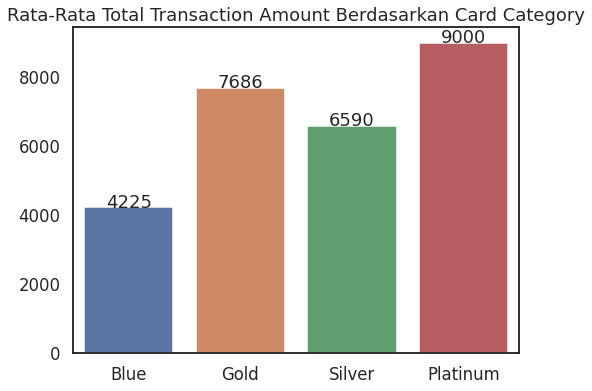

In [ ]:
plt.figure(figsize=(8, 6))
plt.title('Rata-Rata Total Transaction Amount Berdasarkan Card Category')
 
Total_Count = []
Card_Count = df['Card_Category'].unique()
 
for n in Card_Count:
    Sum_Category = df.loc[(df['Card_Category']==n)]
    Total_Data_Category = len(Sum_Category)
    Total_Category = Sum_Category['Total_Trans_Amt'].sum()
    Total_Category = int(round(Total_Category/Total_Data_Category, 0))
    Total_Count.append(Total_Category)
 
Card_Count_Bar = sns.barplot(x=Card_Count, y=Total_Count)
 
for i, p in enumerate(Card_Count_Bar.patches):
    height = p.get_height()
    Card_Count_Bar.text(p.get_x()+p.get_width()/2., height + 0.5, Total_Count[i],ha="center")
 
plt.show()

**Deskripsi Data**

Tujuan dari visualisasi diagram batang antara kategori kartu dengan jumlah umur customer adalah untuk mengetahui kategori kartu berdasarkan umur customer

Dari diagram batang di bawah dapat disimpulkan bahwa kategori kartu Platinum memiliki jumlah rata-rata total transaksi yang paling banyak yaitu 9000 dan rata-rata jumlah transaksi paling rendah yaitu kategori kartu Blue sebanyak 4225

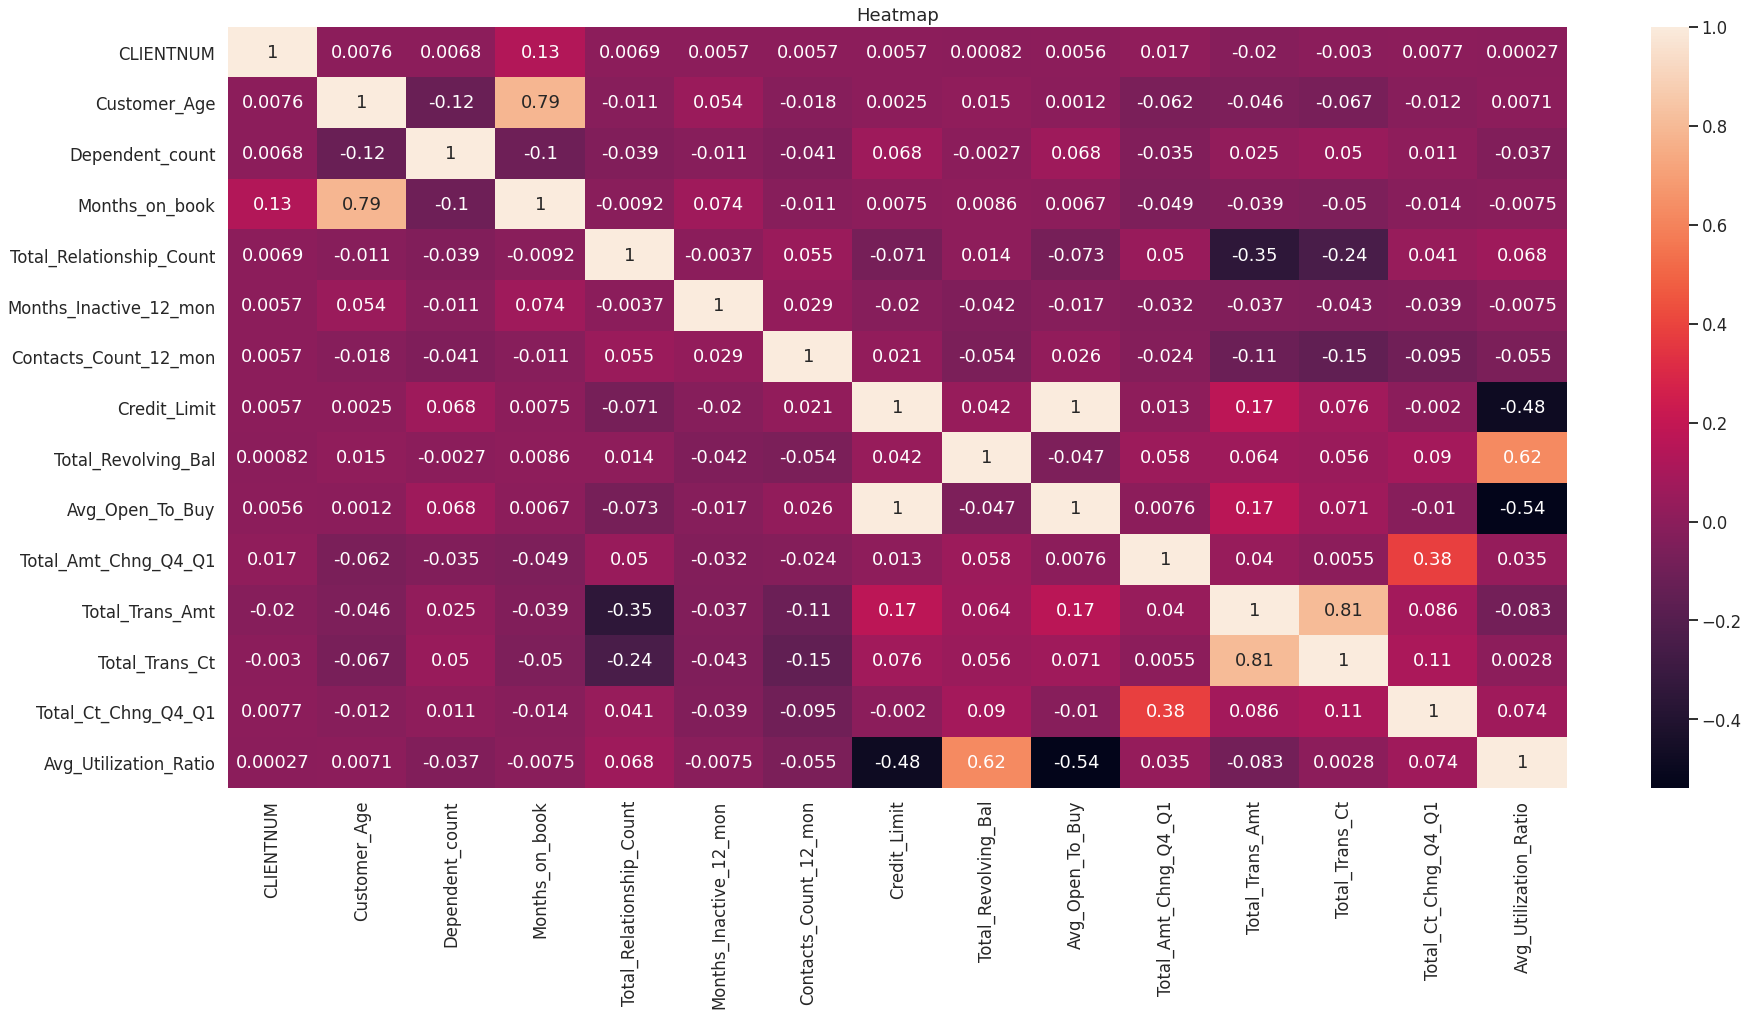

In [ ]:
df.drop("Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1", axis = 1, inplace = True)
df.drop("Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2", axis = 1, inplace = True)
plt.figure(figsize = (30,14))
plt.title("Heatmap")
sns.heatmap(df.corr(), annot = True )

**Deskripsi Data**

Tujuan dari visualisasi korelasi heatmap antar data adalah untuk mengetahui apakah data-data tersebut berkorelasi dengan kuat atau tidak berkorelasi dengan data-data lainnya. Pada gambar heatmap diatas dapat disimpulkan bahwa :

Total Transaction Amount memiliki korelasi yang sangat kuat terhadap Total Transaction Count dengan nilai korelasi positif sebesar 0.81

# **Kesimpulan**

Berdasarkan metode metode yang telah kami buat :
1. Berdasarkan data histogram customer age kita dapat mengetahui rata2 umur customer yaitu 46, termuda = 26, tertua = 73 
2. Dapat kita lihat pada lineplot hubungan total transaksi dengan umur, semakin kekanan maka diagram garis mengalami penurunan, yang berarti semakin bertambahnya umur seseorang, maka jumlah transaksi yang dilakukannya akan berkurang.
3. Berdasarkan wrangle data dari Attrition Flag dengan diagram lingkaran bahwa customer yang sudah ada sebanyak 83,93% dan customer yang tertarik sebanyak 16,07%, dan gender dari customer yang sudah ada dan customer yang kemungkinan keluar dari bank lebih banyak perempuan daripada laki - laki.
4. Dapat dilihat dari diagram batang di atas  dapat disimpulkan bahwa kategori kartu Platinum memiliki jumlah rata-rata total transaksi yang paling banyak yaitu 9000 dan rata-rata jumlah transaksi paling rendah yaitu kategori kartu Blue sebanyak 4225
5. Total Transaction Amount memiliki korelasi yang sangat kuat terhadap Total Transaction Count dengan nilai korelasi positif sebesar 0.81